In [3]:
import pandas as pd
import os
import boto3
from dotenv import load_dotenv

df = pd.read_csv('data/df_reducedS3.csv')

# Filtre données 2019)
df_2019 = df[df['année'] == 2019].copy()

# Supprimer les colonnes inutiles
df_2019.drop(columns=['Code_Dpt', 'année'], inplace=True, errors='ignore')

# Transformer les variables catégorielles en dummies
df_dummies_2019 = pd.get_dummies(df_2019, drop_first=False)  # Convertit toutes les colonnes non numériques en colonnes de 0/1.
# drop_first=False pour garder toutes les catégories

# Sauvegarde en csv
df_dummies_2019.to_csv("data/df_dummies_2019.csv", index=False, encoding='utf-8-sig')

display(df_dummies_2019.head())

# Sauvegarde sur S3
load_dotenv("secrets.env")

# Récupérer les valeurs
AWS_KEY = os.getenv("AWS_ACCESS_KEY_ID")
AWS_SECRET = os.getenv("AWS_SECRET_ACCESS_KEY")
BUCKET_NAME = os.getenv("AWS_BUCKET_NAME")

s3 = boto3.client("s3", 
                  aws_access_key_id=AWS_KEY, 
                  aws_secret_access_key=AWS_SECRET)

# envoi du fichier
s3.upload_file("data/df_dummies_2019.csv", BUCKET_NAME, "df_dummies_2019.csv")


,densité,pop_globale,tranche_age_0-24,tranche_age_25-59,tranche_age_60+,csp1_agriculteurs,csp2_artisans_commerçant_chef_entreprises,csp3_cadres_professions_intellectuelles,csp4_professions_intermédiaires,csp5_employés,...,Département_Territoire de Belfort,Département_Val-D'Oise,Département_Val-de-Marne,Département_Var,Département_Vaucluse,Département_Vendée,Département_Vienne,Département_Vosges,Département_Yonne,Département_Yvelines
480,112.8,652899,197873,301956,153070,3311,20573,47626,84831,85718,...,False,False,False,False,False,False,False,False,False,False
481,72.3,531455,158881,229516,143058,4430,11660,19583,51482,70970,...,False,False,False,False,False,False,False,False,False,False
482,45.7,335741,83372,135150,117219,5167,9602,12736,31707,45095,...,False,False,False,False,False,False,False,False,False,False
483,23.7,164645,41212,68710,54723,2034,7090,8059,18417,21491,...,False,False,False,False,False,False,False,False,False,False
484,25.5,140975,35447,60543,44985,1863,6221,6391,17162,20524,...,False,False,False,False,False,False,False,False,False,False


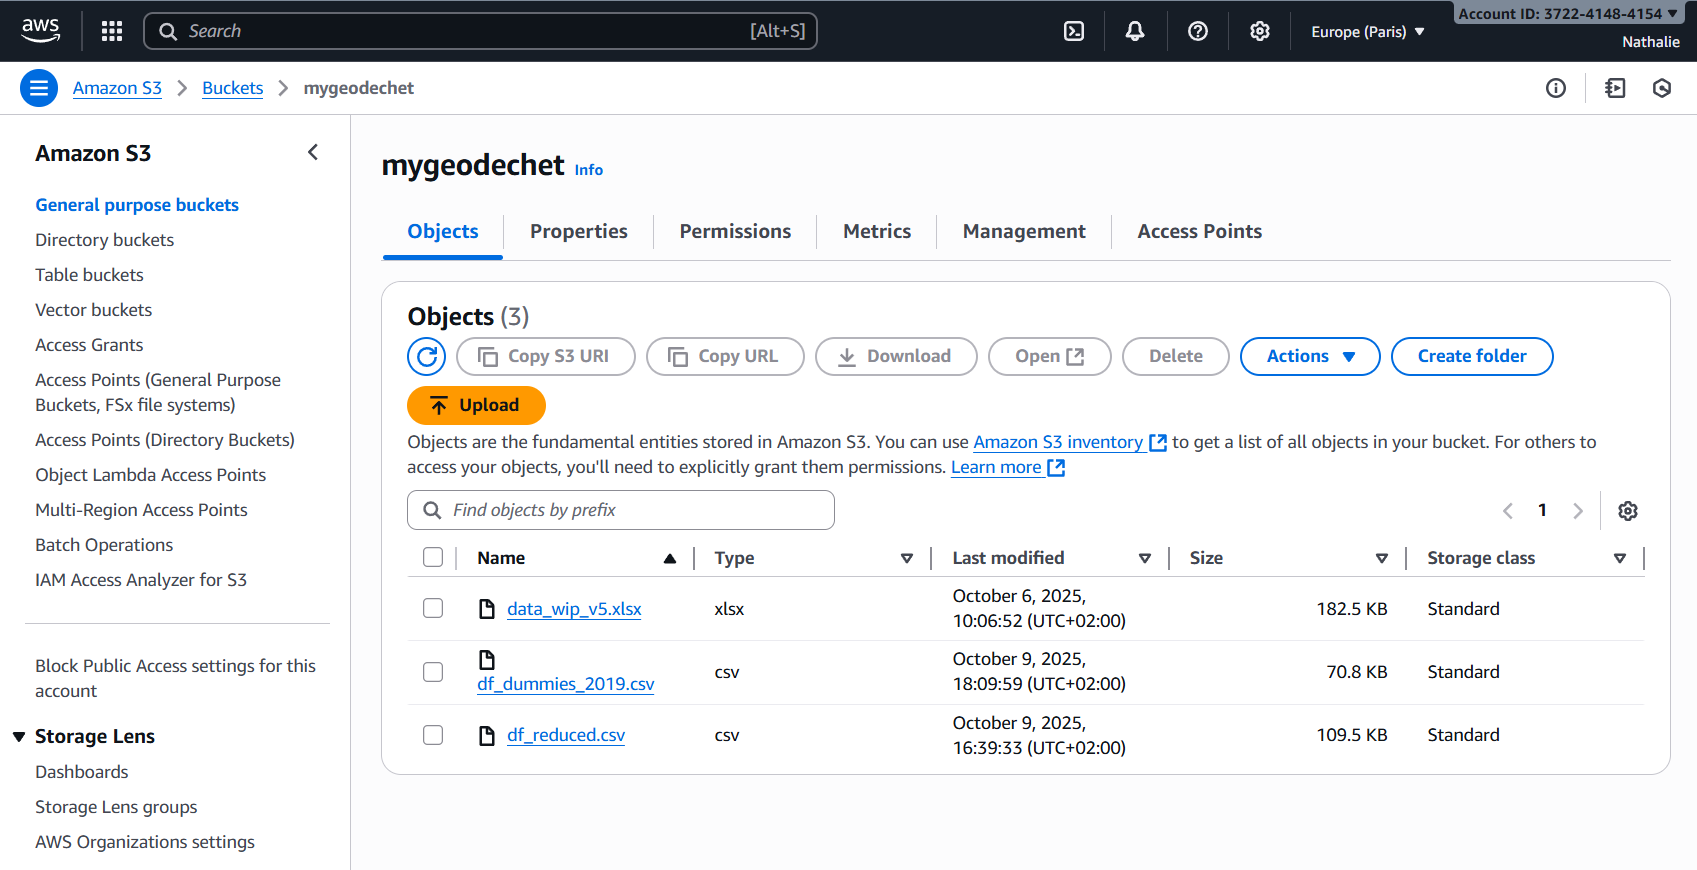